In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("creditcard.csv.zip")

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
fraud=df.loc[df["Class"]==1]
normal=df.loc[df["Class"]==0]

In [7]:
len(fraud)

492

In [8]:
len(normal)

284315

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

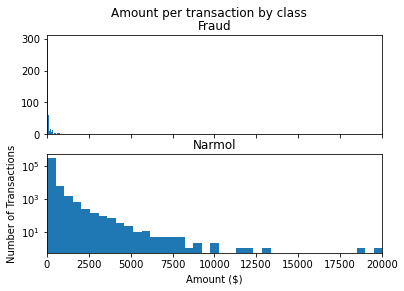

In [10]:
f, (ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle("Amount per transaction by class")
bins=50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title("Fraud")
ax2.hist(normal.Amount,bins=bins)
ax2.set_title("Narmol")
plt.xlabel("Amount ($)")
plt.ylabel("Number of Transactions")
plt.xlim(0,20000)
plt.yscale("log")
plt.show();

In [ ]:
sns.set_style("whitegrid")
sns.countplot(x="Amount",hue='Class',data=df)

In [11]:
X=df.iloc[:,:-1]
y=df["Class"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=4)

In [14]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(X_train,y_train)

C:\Users\91890\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_predict=lo.predict(x_test)

In [17]:
from sklearn.svm import SVC 
svc_model=SVC()
svc_model.fit(X_train,y_train)
prediction=svc_model.predict(x_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
rfc_predict=rfc.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [21]:
print(confusion_matrix(y_test,y_predict))

[[93766    60]
 [   43   118]]


In [24]:
print(accuracy_score(y_test,prediction))

0.998286997137902


In [25]:
print(accuracy_score(y_test,y_predict))

0.9989041037590305


In [26]:
print(accuracy_score(y_test,rfc_predict))

0.9995531296881484


In [27]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93826
           1       0.66      0.73      0.70       161

    accuracy                           1.00     93987
   macro avg       0.83      0.87      0.85     93987
weighted avg       1.00      1.00      1.00     93987

